In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [6]:
dfa = pd.read_csv('/content/diabetes_data_upload.csv')

In [7]:
dfa.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


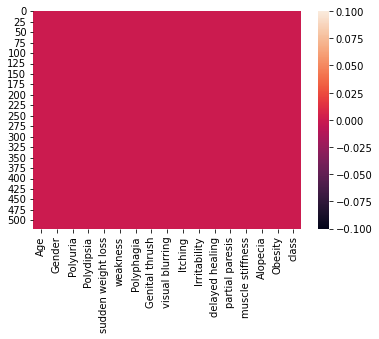

In [8]:
sns.heatmap(dfa.isnull()) 

In [9]:
dfa['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [10]:
dfa['Gender'] = dfa['Gender'].map({'Male':1,'Female':0})
dfa['class'] = dfa['class'].map({'Positive':1,'Negative':0})
dfa['Polyuria'] = dfa['Polyuria'].map({'Yes':1,'No':0})
dfa['Polydipsia'] = dfa['Polydipsia'].map({'Yes':1,'No':0})
dfa['sudden weight loss'] = dfa['sudden weight loss'].map({'Yes':1,'No':0})
dfa['weakness'] = dfa['weakness'].map({'Yes':1,'No':0})
dfa['Polyphagia'] = dfa['Polyphagia'].map({'Yes':1,'No':0})
dfa['Genital thrush'] = dfa['Genital thrush'].map({'Yes':1,'No':0})
dfa['visual blurring'] = dfa['visual blurring'].map({'Yes':1,'No':0})
dfa['Itching'] = dfa['Itching'].map({'Yes':1,'No':0})
dfa['Irritability'] = dfa['Irritability'].map({'Yes':1,'No':0})
dfa['delayed healing'] = dfa['delayed healing'].map({'Yes':1,'No':0})
dfa['partial paresis'] = dfa['partial paresis'].map({'Yes':1,'No':0})
dfa['muscle stiffness'] = dfa['muscle stiffness'].map({'Yes':1,'No':0})
dfa['Alopecia'] = dfa['Alopecia'].map({'Yes':1,'No':0})
dfa['Obesity'] = dfa['Obesity'].map({'Yes':1,'No':0})

In [11]:
X1 = dfa.iloc[:,0:-1]
y1 = dfa.iloc[:,-1]

In [12]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [14]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [15]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [16]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


In [17]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [18]:
dfa_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [19]:
high_variance = pd.concat([dfa_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [20]:
X = dfa[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dfa['class']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

DecisionTreeClassifier()


In [23]:
pre=dc.predict(X_test)

In [24]:
Decisiontrees_classifier=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.9615384615384616
[[41  3]
 [ 1 59]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [26]:
pre1 = rc.predict(X_test)

In [27]:
Random_forest=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9519230769230769
[[39  2]
 [ 3 60]]


In [ ]:
#so best accuracy is 0.96 with decision tree.